# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [13]:
import pandas as pd
%pylab inline
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/home/carcrupe/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv("terrain.csv")

In [3]:
X = df[["bumpiness","grade"]].values
y = df["target"]

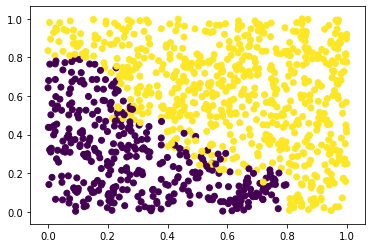

In [14]:
plt.scatter(df['bumpiness'],df['grade'], c=df['target'])

In [24]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

In [26]:
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
clf=LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y)
# Fit the data
clf.fit(X_train,y_train)

/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# With Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

accuracy_score(y_test,clf.predict(X_test))
# Cross Validation
cross_val_score(clf,X,y,scoring="accuracy").mean()

/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.918001346704182

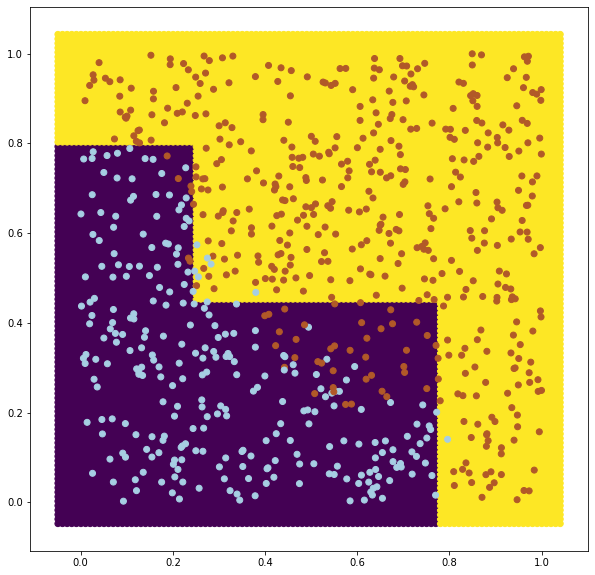

In [77]:
draw(clf,X_train,y_train,0.01)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance
regk = KNeighborsClassifier(n_neighbors=2)
# Fit the data
regk.fit(X_train,y_train)

In [36]:
from sklearn.model_selection import GridSearchCV

In [48]:
gReg = GridSearchCV(regk, cv=5,
param_grid={"n_neighbors":np.arange(3,50)}, scoring='accuracy')

In [49]:
gReg.fit(X,y)
gReg.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

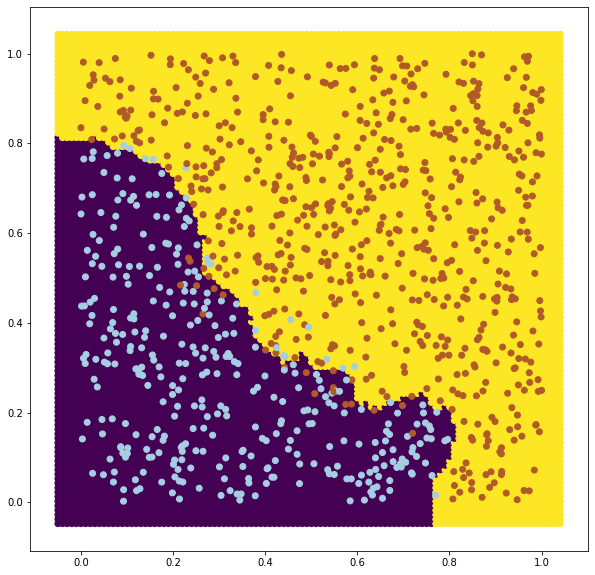

In [76]:
draw(gReg,X,y,0.01)

In [51]:
cross_val_score(gReg, X,y,scoring='accuracy').mean()

/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9400055311064618

In [60]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87        83
         1.0       0.93      0.95      0.94       167

    accuracy                           0.92       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.92      0.92      0.92       250



In [57]:
precision_score(y_test,clf.predict(X_test))

0.9294117647058824

In [58]:
# Cross Validation
cross_val_score(clf,X,y,scoring="precision")

/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.90707965, 0.92139738, 0.9122807 ])

In [59]:
cross_val_score(clf,X,y,scoring="recall")

/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carcrupe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.94907407, 0.97685185, 0.96744186])

In [61]:
from sklearn.svm import SVC
# Create an instance of the classifier
clf = SVC(kernel="linear",C=10)
# Fit the data
clf.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
cross_val_score(clf,X,y,cv=5).mean()

0.9260284007100177

In [68]:
from sklearn.tree import DecisionTreeClassifier
# Create instance
clf = DecisionTreeClassifier(min_samples_leaf=20,max_depth=3)
# Fit the data
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
clfG = GridSearchCV(clf,cv=5, param_grid ={'min_samples_leaf':np.arange(10,100),'max_depth':np.arange(1,20)})

In [73]:
clfG.fit(X,y)
clfG.best_estimator_.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
clfG.best_params_

{'max_depth': 5, 'min_samples_leaf': 26}

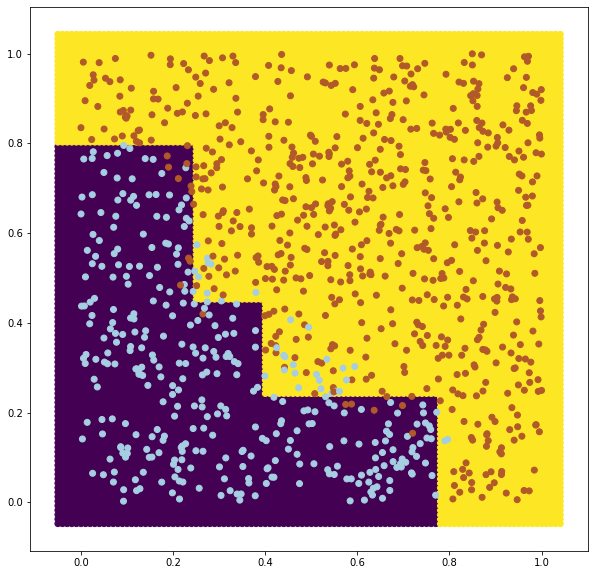

In [75]:
draw(clfG,X,y,0.01)